In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Check for missing values
dataset.isnull().values.any()

False

In [5]:
#Splitting the dataset into dependent and independent values 
x = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values
print(x)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [6]:
#Encoding the feature (Geography and Gender)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x[0])

[1.0 0.0 0.0 1.0 0.0 619 42 2 0.0 1 1 1 101348.88]


In [7]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [8]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,[5,6,7,8,9,12]] = sc.fit_transform(x_train[:,[5,6,7,8,9,12]])
x_test[:,[5,6,7,8,9,12]] = sc.transform(x_test[:,[5,6,7,8,9,12]])

In [10]:
print(x_train)
print(x_test)

[[0.0 0.0 1.0 ... 1 0 1.1064316603959772]
 [0.0 1.0 0.0 ... 1 1 -0.7486644675354392]
 [1.0 0.0 0.0 ... 1 0 1.48533466701551]
 ...
 [1.0 0.0 0.0 ... 1 0 1.4123199381297087]
 [0.0 0.0 1.0 ... 1 1 0.8443212126890041]
 [0.0 1.0 0.0 ... 1 0 0.32472464658797906]]
[[0.0 1.0 0.0 ... 1 1 1.6108570683846617]
 [1.0 0.0 0.0 ... 1 0 0.49587036879966806]
 [0.0 0.0 1.0 ... 1 1 -0.42478673883027473]
 ...
 [0.0 0.0 1.0 ... 1 0 0.7188846723542275]
 [0.0 1.0 0.0 ... 1 1 -1.5450780513082378]
 [0.0 1.0 0.0 ... 1 0 1.6125591677968782]]


In [11]:
#Training the Random Forest Classification Model on the training set
from sklearn.ensemble import RandomForestClassifier
classifier  = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
#Predicting test results
y_pred = classifier.predict(x_test)

In [13]:
#Calculating the accuracy score and confusion matrix for test set
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac_randomForest = accuracy_score(y_test,y_pred)
print(cm)
print(ac_randomForest)

[[1526   69]
 [ 198  207]]
0.8665


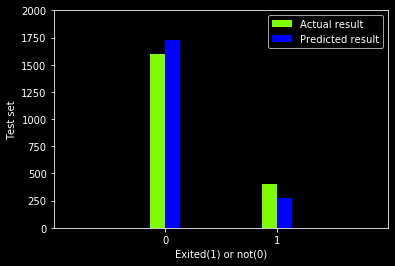

In [14]:
#Visualizing the test results
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
bins = np.linspace(-1,2,10)
plt.hist([y_test,y_pred],bins=bins,color=['lawngreen','blue'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Exited(1) or not(0)')
plt.ylabel('Test set')
plt.xlim(-1,2)
plt.ylim(0,2000)
plt.legend()
plt.xticks([0,1])
plt.show()

----

In [15]:
#Training the Decision Tree Classification on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [16]:
#Predicting test results
y_pred = classifier.predict(x_test)

In [17]:
#Calculating the accuracy score and confusion matrix for test set
from sklearn.metrics import confusion_matrix,accuracy_score
cm_DecisionTree = confusion_matrix(y_test,y_pred)
ac_DecisionTree = accuracy_score(y_test,y_pred)
print(cm)
print(ac_DecisionTree)

[[1526   69]
 [ 198  207]]
0.8045


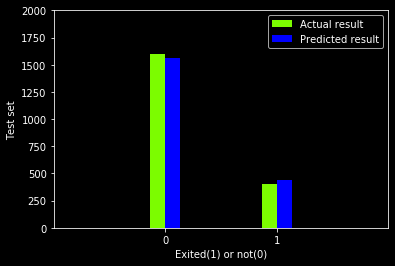

In [18]:
#Visualizing the test results
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
bins = np.linspace(-1,2,10)
plt.hist([y_test,y_pred],bins=bins,color=['lawngreen','blue'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Exited(1) or not(0)')
plt.ylabel('Test set')
plt.xlim(-1,2)
plt.ylim(0,2000)
plt.legend()
plt.xticks([0,1])
plt.show()

---

In [19]:
#Training the K-NN model on the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
#Predicting test results
y_pred = classifier.predict(x_test)

In [21]:
#Calculating the accuracy score and confusion matrix for test set
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac_KNN = accuracy_score(y_test,y_pred)
print(cm)
print(ac_KNN)

[[1489  106]
 [ 223  182]]
0.8355


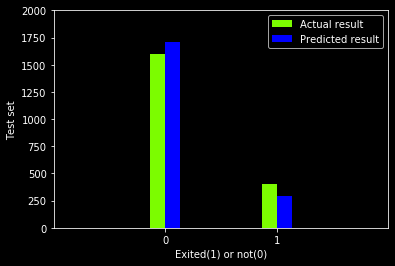

In [22]:
#Visualizing the test results
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
bins = np.linspace(-1,2,10)
plt.hist([y_test,y_pred],bins=bins,color=['lawngreen','blue'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Exited(1) or not(0)')
plt.ylabel('Test set')
plt.xlim(-1,2)
plt.ylim(0,2000)
plt.legend()
plt.xticks([0,1])
plt.show()

---

In [23]:
#Training the SVM Non-Linear model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
#Predicting test results
y_pred = classifier.predict(x_test)

In [25]:
#Calculating the accuracy score and confusion matrix for test set
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac_SVM = accuracy_score(y_test,y_pred)
print(cm)
print(ac_SVM)

[[1561   34]
 [ 230  175]]
0.868


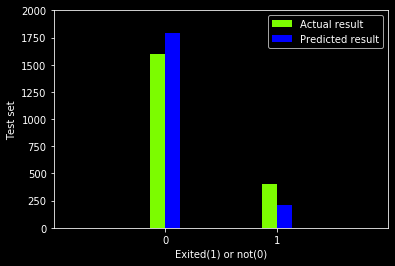

In [26]:
#Visualizing the test results
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
bins = np.linspace(-1,2,10)
plt.hist([y_test,y_pred],bins=bins,color=['lawngreen','blue'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Exited(1) or not(0)')
plt.ylabel('Test set')
plt.xlim(-1,2)
plt.ylim(0,2000)
plt.legend()
plt.xticks([0,1])
plt.show()

---

In [27]:
#Training the Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
#Predicting test results
y_pred = classifier.predict(x_test)

In [29]:
#Calculating the accuracy score and confusion matrix for test set
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac_NBayes = accuracy_score(y_test,y_pred)
print(cm)
print(ac_NBayes)

[[1440  155]
 [ 238  167]]
0.8035


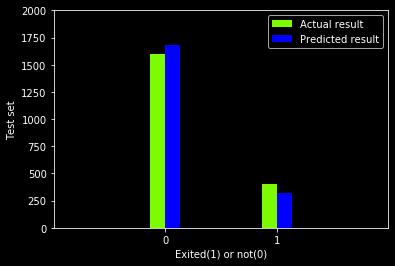

In [30]:
#Visualizing the test results
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
bins = np.linspace(-1,2,10)
plt.hist([y_test,y_pred],bins=bins,color=['lawngreen','blue'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Exited(1) or not(0)')
plt.ylabel('Test set')
plt.xlim(-1,2)
plt.ylim(0,2000)
plt.legend()
plt.xticks([0,1])
plt.show()

----

In [31]:
#Training the SVM Linear model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [32]:
#Predicting test results
y_pred = classifier.predict(x_test)

In [33]:
#Calculating the accuracy score and confusion matrix for test set
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac_linearSVM = accuracy_score(y_test,y_pred)
print(cm)
print(ac_linearSVM)

[[1595    0]
 [ 405    0]]
0.7975


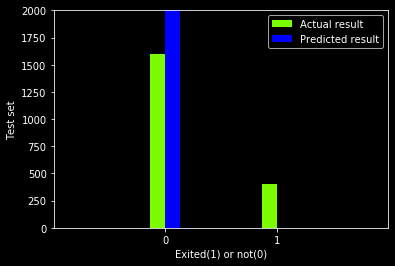

In [34]:
#Visualizing the test results
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
bins = np.linspace(-1,2,10)
plt.hist([y_test,y_pred],bins=bins,color=['lawngreen','blue'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Exited(1) or not(0)')
plt.ylabel('Test set')
plt.xlim(-1,2)
plt.ylim(0,2000)
plt.legend()
plt.xticks([0,1])
plt.show()

---------------------------------------

In [35]:
#Training the Logistic Regression on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#Predicting test results
y_pred = classifier.predict(x_test)

In [37]:
#Calculating the accuracy score and confusion matrix for test set
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
ac_LogReg = accuracy_score(y_test,y_pred)
print(cm)
print(ac_LogReg)

[[1526   69]
 [ 309   96]]
0.811


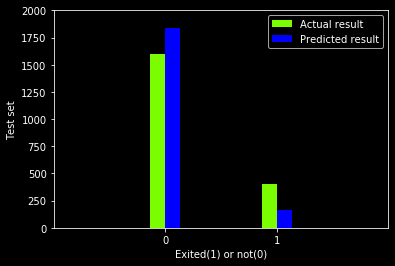

In [38]:
#Visualizing the test results
plt.style.use('dark_background')
plt.figure(figsize=(6,4))
bins = np.linspace(-1,2,10)
plt.hist([y_test,y_pred],bins=bins,color=['lawngreen','blue'],label=['Actual result','Predicted result'],align='left')
plt.xlabel('Exited(1) or not(0)')
plt.ylabel('Test set')
plt.xlim(-1,2)
plt.ylim(0,2000)
plt.legend()
plt.xticks([0,1])
plt.show()

In [39]:
#Comparing results of the models based on accuracy score
mylist = [ac_randomForest,ac_DecisionTree,ac_KNN,ac_SVM,ac_NBayes,ac_linearSVM,ac_LogReg]

In [40]:
for i in range(0,len(mylist)):
    mylist[i] = mylist[i]*100
print(mylist)

[86.65, 80.45, 83.55, 86.8, 80.35, 79.75, 81.10000000000001]


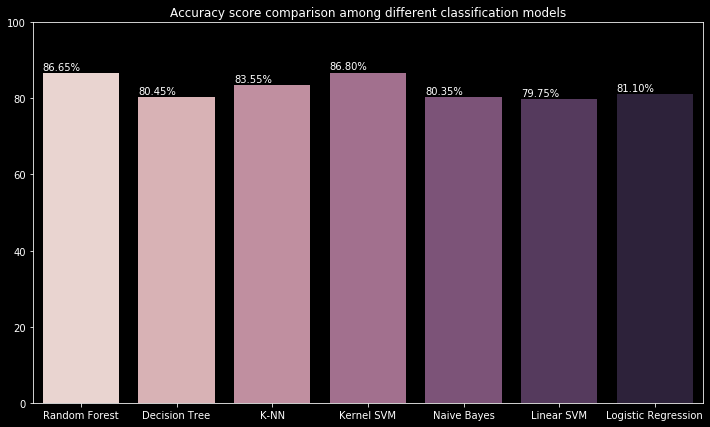

In [84]:
labelList = ['Random Forest','Decision Tree', 'K-NN', 'Kernel SVM', 'Naive Bayes', 'Linear SVM', 'Logistic Regression']
plt.figure(figsize=(12,7))           
ax = sns.barplot(x=labelList,y=mylist,palette=sns.cubehelix_palette(7))
plt.ylim(0,100)
plt.title('Accuracy score comparison among different classification models')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (x, y + height + 0.8))
plt.show()